<a href="https://colab.research.google.com/github/Warleygomes/Machine-Learning/blob/master/MachineLearningLDA_QDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Métricas

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Modelo

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
bd = pd.read_csv("https://raw.githubusercontent.com/neylsoncrepalde/ML_classes/master/Data/Default.csv")
bd.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


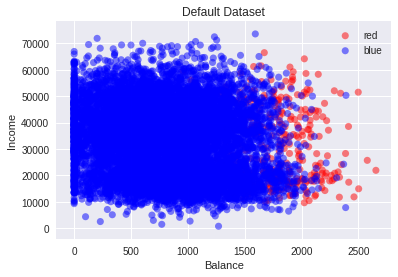

In [3]:
fig, ax = plt.subplots()

color = []
for color in ['red', 'blue']:
    if color == "red":
        x = bd.loc[bd["default"] == "Yes", "balance"]
        y = bd.loc[bd["default"] == "Yes", "income"]
    else:
        x = bd.loc[bd["default"] == "No", "balance"]
        y = bd.loc[bd["default"] == "No", "income"]
    ax.scatter(x, y, c=color, s=50, label=color,
               alpha=0.5, edgecolors='none')

ax.legend()
plt.title("Default Dataset")
plt.xlabel("Balance")
plt.ylabel("Income")
plt.show()

In [4]:
# Primeira coisa
# Extrair as dummies
bd1 = pd.get_dummies(bd, drop_first=True)
bd1.columns

Index(['balance', 'income', 'default_Yes', 'student_Yes'], dtype='object')

In [0]:
X = bd1[["student_Yes", "balance", "income"]]
y = bd1.default_Yes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [10]:
lda1 = LinearDiscriminantAnalysis(solver="eigen")
lda1.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='eigen', store_covariance=False, tol=0.0001)

In [12]:
lda1.coef_

array([[-8.83246399e+00,  8.29936699e-02,  1.26668426e-04]])

In [14]:
yhat = lda1.predict(X_test)
auc = roc_auc_score(y_test, yhat)
print("AUC: ", auc)

AUC:  0.8646262640762469


In [16]:
# Implementando QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [18]:
# predição
yhat2 = qda.predict(X_test)
pd.crosstab(y_test, yhat2)

col_0,0,1
default_Yes,,
0,2898,11
1,62,29


In [0]:
auc2 = auc_roc_score(y_test, yhat2)
print